#***Sistema de Equações Algébricas Não-Lineares***

##Questão 01

O coeficiente de saturação de oxigênio dissolvido em água fresca pode ser calculado pela equação (ALPHA,1992).

$ln_{osf} =-139,3441 + \frac{1,575701*10^{5}}{T_{a}}-\frac{8,621949*10^{7}}{T^2_{a}}+\frac{1,243800*10^{10}}{T^3_{a}}-\frac{8,621949*10^{11}}{T^4_{a}}$

Onde $o_{sf}$ é a concentração de saturação de oxigênio dissolvido em água fresca a 1 atm (mg/L)e $T_{a}$ é a temperatura absoluta (K).Lembre-se que $T_{a} = T + 273,15$, onde $T$ é a temperatura $(ºC)$. De acordo com essa equação, a saturação diminui com o aumento da temperatura. Para águas naturais típicas em climas temperados, a equação pode ser usada para determinar a variação da concentração de oxigênio de 14,621 mg/L a 0ºC até 6,413 mg/L a 40ºC. Dado um valor da concentração de oxigênio, essa fórmula os métodos da bissecção e da falsa posição podem ser usados para determinar a temperatura em ºC.

a) Desenvolva e teste o algoritmo de Newton-Raphson para determinar a temperatura como função de uma dada concentração de oxigênio até um erro absoluto pré-especificado como em (a). Dada as aproximações iniciais de $0ºC$ e $40ºC$, teste seu programa para um erro absoluto de 0,05ºC e os seguintes casos: $o_{sf}=8,10\space e \space  12$mg/L. Obs.: Para esse caso, use o erro absoluto, apresentado no exercício passado.

b) Compare os resultados com os do exercício passado.



In [ ]:
#Bibliotecas
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import time

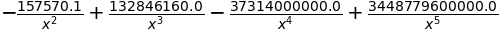

In [ ]:
# # Código para encontrar a derivada da equação ALPHA
from sympy import*
f,x = symbols('f x')
init_printing(use_unicode= True)
f = (-139.34411+((1.575701*(10**5))/x)-((6.642308*(10**7))/(x**2))+((1.243800*(10**10))/(x**3))-((8.621949*(10**11))/(x**4)))-ln(8)
diff(f,x)

In [ ]:
# Método de NR

import time as t
tempo  = t.time()
#define-se a função de base, dada no exercicio para a concentração de 8mg/L
def f8(x):
  f = (-139.34411+((1.575701*(10**5))/x)-((6.642308*(10**7))/(x**2))+((1.243800*(10**10))/(x**3))-((8.621949*(10**11))/(x**4)))-np.log(8)
  return f
# define-se a derivada dessa mesma função, para cálculos posteriores do método de Newton Raphson
def g3linha(x):
  f3_linha = (-157570.1/x**2)+(132846160.0/x**3)-(37314000000.0/x**4)+(3448779600000.0/x**5)
  return f3_linha


T0 = 273 #ponto inicial
Tf = T0 + 40 #ponto final
eps1 = 0.05 
eps2 = eps1
maxiter = 100 # Observar aqui 
lista   = [T0]
iter    = 0

# Método de Newton / Concentração 8
while (math.fabs(f8(T0))>eps1) and (iter<=maxiter): #inicio do laço
  print('[',round(T0,3),']')
  xk = T0 - f8(T0)/g3linha(T0) #novas iterações 
  lista.append(xk) #armazenamento
  if (math.fabs(f8(T0))<eps1) or (math.fabs(xk-T0)<eps2): #critério de parada
    break;
  else: #reajuste
    T0 = xk  
  iter = iter + 1
#prints finais
print("Temperatura Desejada:",round(xk,3))
print('Número de iterações: ',iter)
print('Precisao |f(xk)|: ',math.fabs(f8(xk)))

tempoExec = t.time() - tempo
print(f'Tempo de execução: {round(tempoExec,5)} segundos')


[ 273 ]
[ 294.396 ]
Temperatura Desejada: 299.71
Número de iterações:  2
Precisao |f(xk)|:  0.003971163460440241
Tempo de execução: 0.00478 segundos


In [ ]:
import time as t
tempo = t.time()
def f10(x):
  f = (-139.34411+((1.575701*(10**5))/x)-((6.642308*(10**7))/(x**2))+((1.243800*(10**10))/(x**3))-((8.621949*(10**11))/(x**4)))-np.log(10)
  return f
def g3linha(x):
  f3_linha = (-157570.1/x**2)+(132846160.0/x**3)-(37314000000.0/x**4)+(3448779600000.0/x**5)
  return f3_linha

T0 = 273
Tf = (273+40)

# Variaveis
eps1 = 0.05
eps2 = eps1
maxiter = 100 # Observar aqui 
lista   = [T0]
iter    = 0

# Método de Newton Concentração 10

while (math.fabs(f10(T0))>eps1) and (iter<=maxiter): 
  #print('[',round(T0,3),']')
  xl = T0 - f10(T0)/g3linha(T0)
  lista.append(xl)
  if (math.fabs(f10(T0))<eps1) or (math.fabs(xl-T0)<eps2):
    break;
  else:
    T0 = xl  
  iter = iter + 1

print("Temperatura Desejada:",round(xl,3))
print('Número de iterações: ',iter)
print('Precisao |f(xk)|: ',math.fabs(f10(xl)))
tempoExec = t.time() - tempo
print(f'Tempo de execução: {round(tempoExec,5)} segundos')

Temperatura Desejada: 286.534
Número de iterações:  1
Precisao |f(xk)|:  0.043726182605330344
Tempo de execução: 0.00116 segundos


In [ ]:
# Método de NR
# # Código para encontrar a derivada da equação ALPHA
import time as t
tempo  = t.time()
from sympy import*
f,x = symbols('f x')
init_printing(use_unicode= True)
f = (-139.34411+((1.575701*(10**5))/x)-((6.642308*(10**7))/(x**2))+((1.243800*(10**10))/(x**3))-((8.621949*(10**11))/(x**4)))-ln(8)
diff(f,x)

def f12(x):
  f = (-139.34411+((1.575701*(10**5))/x)-((6.642308*(10**7))/(x**2))+((1.243800*(10**10))/(x**3))-((8.621949*(10**11))/(x**4)))-np.log(12)
  return f
def g3linha(x):
  f3_linha = (-157570.1/x**2)+(132846160.0/x**3)-(37314000000.0/x**4)+(3448779600000.0/x**5)
  return f3_linha

T0 = [273,273,273]
Tf = []
for i in range(len(T0)):
  a = T0[i]+40
  Tf.append(a)

eps1 = 0.05
eps2 = eps1
maxiter = 100
lista   = [T0]
iter    = [0,0,0]

# Metodo de Newton Concentração 12
while (math.fabs(f12(T0[2]))>eps1) and (iter[2]<=maxiter): 
  print('[',round(T0[2],3),']')
  xx = T0[2] - f12(T0[2])/g3linha(T0[2])
  lista.append(xx)
  if (math.fabs(f12(T0[2]))<eps1) and (math.fabs(xx[2]-T0[2])<eps2):
    break;
  else:
    T0[2] = xx  
  iter[2] = iter[2] + 1

print("Temperatura Desejada:",round(xx,3))
print('Número de iterações: ',iter[2])
print('Precisao |f(xk)|: ',math.fabs(f12(xx)))

tempoExec = t.time() - tempo
print(f'Tempo de execução: {round(tempoExec,5)} segundos')


[ 273 ]
Temperatura Desejada: 280.11
Número de iterações:  1
Precisao |f(xk)|:  0.012534107180245169
Tempo de execução: 0.00416 segundos


###LETRA B

$Bissecção:$ 

Tempo para o de 8: 0.00732 segundos

Tempo para o de 10: 0.00722 segundos

Tempo para o de 12: 0.00638 segundos$



$Falsa \ Posição:$

Tempo para o de 8: 0.01112 segundos

Tempo para o de 10: 0.00845 segundos

Tempo para o de 12: 0.00811 segundos

$Método \ de \ Newton-Raphson$

Tempo para o de 8: 0.00195 segundos

Tempo para o de 10: 0.00157 segundos

Tempo para o de 12: 0.00391 segundos


Dentre os três métodos o que possui o menor tempo para ser realizado é o método de Newton-Raphson. Isso pode estar relacionado com o fato de que esse método pediu o menor número de iterações dentre as nossas opções, sendo respectivamente: 2 , 1 e 1 iterações para as concentrações de 8, 10 e 12 mol/L. 
A seguir, ocupando o segundo lugar nesta categoria, temos que o método da Bissecção passa a ser mais rápido. Entretanto, como foi dito na atividade anterior, apesar de realizar um número menor de iterações, apresenta um erro maior. Dessa forma, é preciso entender qual o nosso real objetivo mais importante: não sobrecarregar a máquina ou então conseguir um resultado mais preciso. Com essa otimização e este objetivo, é possível escolher o método mais interessante ao usuário.




##Questão 02

Considere o reator CSTR apresentado na Figura 4. O sistema opera em estado estacionário com reação $A + B \rightarrow C$. Utilize o método de Newton-Raphson (NR) para determinar as concentrações dos reagentes A e B assumindo que o CSTR tem $T_{o} = 307k$  e vazão $F = 3\space \frac{m^{3}}{min}$. Os balanços para os reagentes A e B são dados abaixo:

$F(C_{A0}-C_{A})-kC_{A}C_{B}V = 0$

$F(C_{B0}-C_{B})-kC_{A}C_{B}V = 0$

Em que $C_{A0}\space e\space C_{B0}$ são as concentrações de entrada dos reagentes A e B e iguais a $200 \frac{mol}{m^{3}}$, V é o volume do reator e igual a $40\space m^{3}$ e k a constante cinética de reação com o valor $0,0045863\space \frac{m^{3}}{mol\space min}$. Use as concentrações de entrada dos reagentes como condições iniciais para o método NR e um erro relativo de $5%$

In [ ]:
# Código oficial
import time as t
tempo = t.time() # Inicializando uma contagem para verificar o tempo de execução do programa 
#admitir que Ca0 e Cb0 sao constantes
V = 40 #m^3
K = 0.0045863 #m^3/(mol*min) 
C = np.array([200,200]) #matriz com os pontos de partida
F = 3 #m^3/min
T = 307#K

def CSTR(Ca):  #função inicial - F(x(k))
  N = len(Ca)
  Balanco = N*[0]
  Balanco[0] = F*(C[0]-Ca[0])-K*Ca[0]*Ca[1]*V 
  Balanco[1] = F*(C[1]-Ca[1])-K*Ca[0]*Ca[1]*V
  return Balanco

def Jacobiano(Ca): # Derivada das equações fornecidas
  A = [[0,0],[0,0]] 
  A[0][0] = -F-K*Ca[1]*V #Ca[1] é Cb
  A[0][1] = -K*Ca[0]*V  #Ca[0] é Ca
  A[1][0] = -K*Ca[1]*V
  A[1][1] = -F-K*Ca[0]*V
  return A

max_iter = 50 #numero maximo de iteracoes
iter = 1
eps = 0.05 #Erro relativo 5% ou 0,05
div = 10**20 # Para não permitir que o codigo vá para infinito, se exister erro

while (iter <= max_iter): #inicio do laço
  Valores = Jacobiano(C)
  Valores = np.array(Valores)
  b = CSTR(C)
  b = np.array(b) 
  b = (-1*b) # Devemos multiplicar por -1, para corrigir a ordem da matriz B 
  s = np.linalg.solve(Valores,b) 
  x1 = np.array(C) + s
  print("Iterações ",iter,": ",x1) 
  if(np.linalg.norm(s,np.inf)<eps) or (np.linalg.norm(b,np.inf) <eps): 
    print("Convergiu")
    print("Precisão:",np.round(np.linalg.norm(s,np.inf),3))
    break
  if(np.linalg.norm(b,np.inf) > div): 
    print("Divergiu")
    break
  C = x1
  iter = iter + 1
#np.(s,np.inf) é equivalente a xk-x0
print("Ca:",C[0]) #Está imprimindo o penultimo valor 
print("Cb:",C[1])
tempoExec = t.time() - tempo
print(f'Tempo de execução: {round(tempoExec,5)} segundos')

Iterações  1 :  [103.92768863 103.92768863]
Iterações  2 :  [55.75392226 55.75392226]
Iterações  3 :  [31.4423466 31.4423466]
Iterações  4 :  [18.96570225 18.96570225]
Iterações  5 :  [12.33953541 12.33953541]
Iterações  6 :  [8.62868339 8.62868339]
Iterações  7 :  [6.41347213 6.41347213]
Iterações  8 :  [5.0038549 5.0038549]
Iterações  9 :  [4.05401268 4.05401268]
Iterações  10 :  [3.38212817 3.38212817]
Iterações  11 :  [2.88731315 2.88731315]
Iterações  12 :  [2.5105643 2.5105643]
Iterações  13 :  [2.21567893 2.21567893]
Iterações  14 :  [1.97948106 1.97948106]
Iterações  15 :  [1.78657329 1.78657329]
Iterações  16 :  [1.62638999 1.62638999]
Iterações  17 :  [1.49147379 1.49147379]
Iterações  18 :  [1.37642961 1.37642961]
Iterações  19 :  [1.27726875 1.27726875]
Iterações  20 :  [1.19098512 1.19098512]
Iterações  21 :  [1.11527421 1.11527421]
Iterações  22 :  [1.04834226 1.04834226]
Iterações  23 :  [0.98877385 0.98877385]
Iterações  24 :  [0.93543824 0.93543824]
Iterações  25 :  [0

```python
if(np.linalg.norm(s,np.inf)<eps) and (np.linalg.norm(b,np.inf) <eps):
```
Essa parte do código se refere a um criterio de parada, fazendo a norma de s em relação a infinito:

 $||x^{k+1}-x^{k}||_{\infty}$ < $\epsilon$

```python
(np.linalg.norm(b,np.inf) <eps):
```
Já este código a cima se refere ao seguinte critério de parada

$F(x^{*})\space=0 $

$||F(x^{k})||_{infty}$ < $\epsilon$



## Questão 03

Perdas friccionais ou de viscosidade no fluxo de líquidos em um cano resultam em quedas de pressão que devem ser superadas. Estas são expressas em termos de um fator de atrito, f.Para o fluxo turbulento em canos, f é calculado a partir da equação de Colebrook:

$\frac{1}{f^{0,5}}=-2log(\frac{\frac{e}{D}}{3,7}+\frac{2,51}{(Re)f^{0,5}})$

Onde $e$ é a aspereza,$D$ é o diâmetro do cano, e $Re$ é o número de Reynolds, que é adimensional. Para $\frac{e}{D} \space Re = 2*10^{5},$ resolva essa equação para $f$ usando ométodo da secante, usando $f^{-i}=0,001 e f_{0}=0,005,$ para um erro relativo de $1\%$. 

In [ ]:
#EXERCICIO 3
#MÉTODO DA SECANTE 

import matplotlib.pyplot as plt
import numpy as np
import math as math
import time as t
tempo = t.time()
#inicialmente define-se a funcao abaixo:
def f(x):
  a = 0.004
  Re = 2*(10**5)
  z = (Re*((x)**(0.5)))
  return (-2*math.log10((a/3.7)+(2.51/z))) - 1/((x)**0.5)


x0 = 0.001 #chute inicial
x1 = 0.005 #chute inicial
eps1 = 0.01
maxiter = 20
lista   = [x0, x1]
print('[',x0,']')
print('[',x1,']')
iter = 0
x2 = []
while True:  
  x2 = x1 - f(x1)*((x1-x0)/(f(x1)-f(x0))) #equação principal do método - novas iterações
  lista.append(x2)
  print('[',x2,']')
  y = f(x2)  
  if (abs(f(x2-x0))<eps1)|(f(x2)==0): 
    break;
    print(x2)
  else:
    x0 = x1
    x1 = x2  
  iter = iter + 1
  

print('O valor final de f (coeficiente de atrito) é', x2, 'e foi obtido após',iter,'iterações.')
tempoExec = t.time() - tempo
print(f'Tempo de execução: {round(tempoExec,5)} segundos')


[ 0.001 ]
[ 0.005 ]
[ 0.0068937091117461 ]
[ 0.01246405839866573 ]
[ 0.018027493103404693 ]
[ 0.023826290530406895 ]
[ 0.027436459569589438 ]
[ 0.02876378695684279 ]
[ 0.02896426381885586 ]
[ 0.028972563586082675 ]
[ 0.028972608705375817 ]
[ 0.028972608715122895 ]
[ 0.028972608715122906 ]
O valor final de f (coeficiente de atrito) é 0.028972608715122906 e foi obtido após 10 iterações.
Tempo de execução: 0.00448 segundos
